In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist

In [7]:
# MNIST에 백색 잡음 픽셀과 0 픽셀 추가하기
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1
)
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1
)

In [8]:
# 백색 잡음과 0을 추가한 MNIST 데이터에서 모델 훈련하기
from tensorflow import keras
from tensorflow.keras import layers


def get_model():
    model = keras.Sequential(
        [layers.Dense(512, activation="relu"), layers.Dense(10, activation="softmax")]
    )
    model.compile(
        optimizer="rmsprop",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

In [6]:
model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
)

Epoch 1/10
375/375 [==============================] - 3s 7ms/step - loss: 0.6184 - accuracy: 0.8133 - val_loss: 0.2480 - val_accuracy: 0.9292
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 0.2477 - accuracy: 0.9234 - val_loss: 0.2158 - val_accuracy: 0.9324
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1616 - accuracy: 0.9496 - val_loss: 0.1515 - val_accuracy: 0.9540
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1156 - accuracy: 0.9646 - val_loss: 0.2179 - val_accuracy: 0.9304
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0860 - accuracy: 0.9727 - val_loss: 0.1584 - val_accuracy: 0.9529
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0607 - accuracy: 0.9796 - val_loss: 0.1320 - val_accuracy: 0.9632
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0473 - accuracy: 0.9846 - val_loss: 0.1340 - val_accuracy: 0.9647
Epoch 

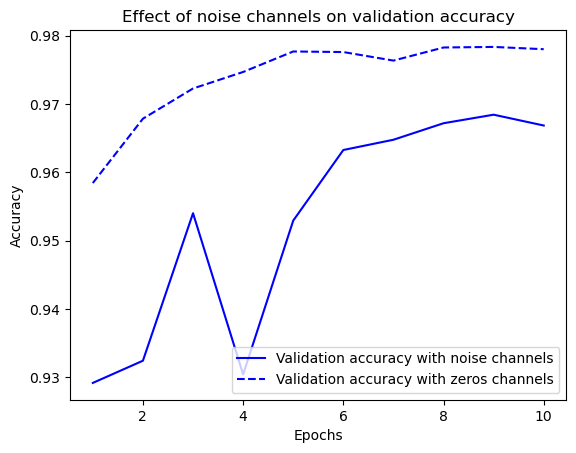

In [12]:
# 검증 정확도 비교 그래프 그리기
import matplotlib.pyplot as plt

val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-", label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--", label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [13]:
# 랜덤하게 섞은 레이블로 MNIST 모델 훈련하기
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential(
    [layers.Dense(512, activation="relu"), layers.Dense(10, activation="softmax")]
)
model.compile(
    optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
model.fit(
    train_images, random_train_labels, epochs=100, batch_size=128, validation_split=0.2
)

Epoch 1/100
375/375 [==============================] - 2s 5ms/step - loss: 2.3165 - accuracy: 0.1053 - val_loss: 2.3047 - val_accuracy: 0.1099
Epoch 2/100
375/375 [==============================] - 2s 6ms/step - loss: 2.3004 - accuracy: 0.1160 - val_loss: 2.3102 - val_accuracy: 0.1080
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2899 - accuracy: 0.1303 - val_loss: 2.3177 - val_accuracy: 0.1031
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2755 - accuracy: 0.1433 - val_loss: 2.3212 - val_accuracy: 0.1008
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2580 - accuracy: 0.1535 - val_loss: 2.3353 - val_accuracy: 0.1041
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2361 - accuracy: 0.1686 - val_loss: 2.3529 - val_accuracy: 0.1041
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2111 - accuracy: 0.1832 - val_loss: 2.3673 - val_accuracy: 0.1018